In [27]:
import pandas as pd
import thulac
import seaborn as sns

In [2]:
myfile = '/Users/zhangmeng/Desktop/study/ESCP_SEP/NLP/sentiment/train_ dataset/labled.csv'
with open(myfile,'r',encoding = 'GB18030', errors = 'ignore') as f:
    raw_data = pd.read_csv(f)

In [3]:
raw_data = raw_data.rename(columns={"微博id": "ID", "微博发布时间": "time", '发布人账号':'user','微博中文内容':'content',
                        '微博图片':'pic', '微博视频':'video','情感倾向':'sentiment'})

In [4]:
df0 = raw_data
df0 = df0.drop(columns=['time','user','pic', 'video'])

In [5]:
#pre-cleaning, deleting or filtering unnecessary words like 'show more'
df0['content'] = df0['content'].astype(str).apply(lambda x : x.replace("展开全文", ""))

In [6]:
print(df0.content[0])

写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早晨给孩子穿上红色的羽绒服羽绒裤，祈祷新的一年，孩子们身体康健。仍然会有一丝焦虑，焦虑我的孩子为什么会过早的懂事，从两岁多开始关注我的情绪，会深沉地说：妈妈，你终于笑了！这句话像刀子一样扎入我?c


In [15]:
thu1 = thulac.thulac(seg_only=True)  #默认模式
df1 = df0
df1['content'] = df1['content'].astype(str).apply(lambda x : thu1.cut(x,text = True))
#text = thu1.cut(df0.content[0], text=True)  #进行一句话分词
#print(text)
df1.head(10)

Model loaded succeed


,ID,content,sentiment
0,4456072029125500,写 在 年末 冬 初 孩子 流感 的 第五 天 ， 我们 仍然 没有 忘记 热情 拥抱 这 ...,0
1,4456074167480980,开 年 大模型 … 累 到 以为 自己 发烧 了 腰 疼 膝盖 疼 腿 疼 胳膊 疼 脖子 ...,-1
2,4456054253264520, 邱晨 这 就 是 我 爹 ， 爹 ， 发烧 快 好 ， 毕竟 美好 的 假期 拿 来 养...,1
3,4456061509126470,新年 的 第一 天 感冒 又 发烧 的 也 太 衰 了 但是 我 要 想 着 明天 一定 会...,1
4,4455979322528190,问 ： 我们 意念 里 有 坏 的 想法 了 ， 天神 就 会 给 记 下 来 ， 那 如果...,1
5,4455960703574270,发高烧 反反复复 ， 眼睛 都 快 睁 不 开 了 。 今天 室友 带 我 去 看 ， 还 ...,-1
6,4456044141311370,明天 考试 今天 发烧 跨年 给 我 跨 坏 了 ？ ？ 2 兰州 · 兰州 交通 大学 ?,-1
7,4456072930597380,# 元旦 快乐 # # 枇杷 手法 小结 # 每个 娃 都 是 有 故事 的 娃 。 每个 ...,0
8,4456059546766320,我 真 的 服 了 x kh 昨天 vv 去 和 她 说 自己 不 舒服 ， 描述 了 症状...,-1
9,4456064361730200,新年 第一 天 ， 为 自己 鼓掌 ? ? ? ? ? ? 发烧 了 也 要 来 看 线 下...,1


In [8]:
from platform import python_version

print(python_version())

3.5.4


Text(0.5,1,'sentiment(target)')

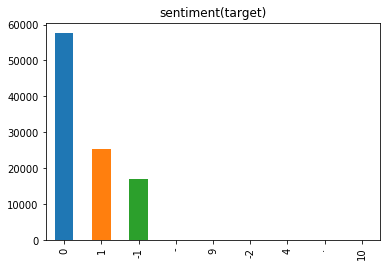

In [17]:
import matplotlib.pyplot as plt
df1.sentiment.value_counts().plot.bar()
plt.title('sentiment(target)')

In [20]:
df1 = df1[df1['sentiment'].isin(['0','1','-1'])]

In [26]:
df1['weibo_len'] = df1['content'].astype(str).apply(len)
sns.kdeplot(df1['weibo_len'])
plt.title('weibo_len')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


NameError: name 'sns' is not defined

In [ ]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df1['content'])
xtrain_count =  count_vect.transform(train_df['text_cut'])